<a href="https://colab.research.google.com/github/ak7588/ProjectsInProgrammingFinal/blob/main/Projects_in_Programming_Finall_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# COVID-19 sentiment analysis and vaccination drive in the U.S.



In [ ]:
!pip install flask-ngrok

!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

In [ ]:
!/ngrok authtoken 274mdonVPNNB8WodHpjJXc5nZsR_2qrYZdh6cASQnw78p5MLv

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)
from datetime import * 
from flask import render_template 
from flask import request

app = Flask(__name__)

@app.route('/')
    # parse data here
    import feedparser
    url = "https://www.wired.com/feed/rss" 
    feed = feedparser.parse(url)
    return render_template('wired.html', feed=feed["entries"])

@app.route('/sentiment')
    def sentiment():
      # do sentiment analysis here
    return

@app.route('/vaccination')
    def vaccination():
      # do vaccination rate analysis here
    return

@app.route('/results')
    def results():
      # do overall analysis here
    return

app.run(host='0.0.0.0', port=5000, debug=True) # anyone can connect, and we're running on port 5000

HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/

In [ ]:
<!-- your html should go here --> 

<!DOCTYPE html>
<html>
<head>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.3/css/bootstrap.min.css" integrity="sha384-MCw98/SFnGE8fJT3GXwEOngsV7Zt27NXFoaoApmYm81iuXoPkFOJwJ8ERdknLPMO" crossorigin="anonymous">
</head>
<body>
    <div class="container">
        <div class="panel panel-info">
            <div class="panel-heading">
                <h1 class="panel-title">Wired Feed</h1>
            </div>
            <table  class="table table-striped table-bordered table-hover">
    <thead>
      <tr>
        <th>Title</th>
        <th>Summary</th>
        <th>Published</th
      </tr>
    </thead>
    <tbody>
      {% for i in feed %}
    <tr>
        <td>{{ i.title }}</td>
        <td>{{ i.summary }}</td>
        <td>{{ i.published }}</td>
    </tr>
      {% endfor %}
    </tbody>
    </table>
  </div>
</div>
</body>
</html>

# **Vaccination Data**

In [3]:
import requests
import datetime as datetime
import pandas as pd

data = pd.read_csv("./US_Vaccination_Data.csv")
data.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United States,2020-12-13,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,31018,25749,6218,0
1,United States,2020-12-14,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,35600,30170,6338,0
2,United States,2020-12-15,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,85393,77629,6605,0
3,United States,2020-12-16,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,245348,232182,7083,0
4,United States,2020-12-17,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,518029,497730,7839,0


In [4]:
data.tail()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
472,United States,2022-03-30,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,561411861,255637895,217749807,97815006
473,United States,2022-03-31,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,561831270,255689909,217801481,97917232
474,United States,2022-04-01,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,562271679,255741552,217857148,98023086
475,United States,2022-04-02,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,562420626,255763206,217879342,98061690
476,United States,2022-04-03,"Johnson&Johnson, Moderna, Pfizer/BioNTech",https://data.cdc.gov/Vaccinations/COVID-19-Vac...,562435301,255765972,217882466,98065668


In [6]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [7]:
data.dtypes

location                           object
date                       datetime64[ns]
vaccine                            object
source_url                         object
total_vaccinations                  int64
people_vaccinated                   int64
people_fully_vaccinated             int64
total_boosters                      int64
dtype: object

In [20]:
data['vaccine'].value_counts()

Johnson&Johnson, Moderna, Pfizer/BioNTech    395
Moderna, Pfizer/BioNTech                      72
Pfizer/BioNTech                               10
Name: vaccine, dtype: int64

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

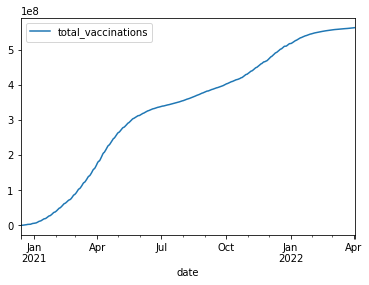

In [9]:
data.plot( x = 'date', y= 'total_vaccinations')

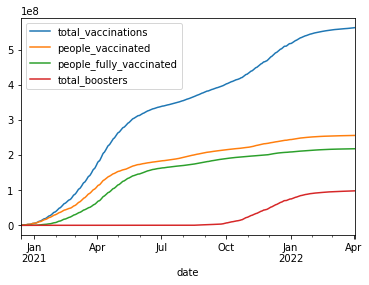

In [13]:
data = data.set_index('date')
data.plot()

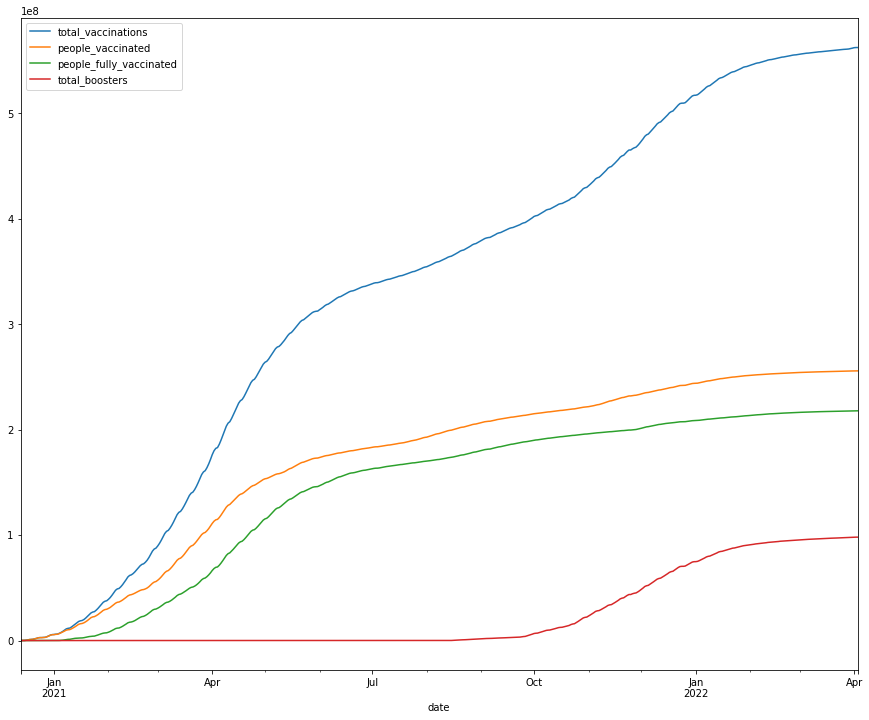

In [18]:

data.plot(
    
    figsize = (15,12)
)

# **Covid Data**

## State-specific Dataframe

In [24]:
covid_state_data = pd.read_csv("./United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
covid_state_data.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.0,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
2,08/22/2020,AR,56199,NaN,NaN,547,0.0,674,NaN,NaN,11,0.0,08/23/2020 02:15:28 PM,Not agree,Not agree
3,07/17/2020,MP,37,37.0,0.0,1,0.0,2,2.0,0.0,0,0.0,07/19/2020 12:00:00 AM,Agree,Agree
4,08/12/2020,AS,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,08/13/2020 02:12:28 PM,NaN,NaN


In [25]:
covid_state_data.tail()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
48235,06/07/2020,SD,5438,NaN,NaN,71,0.0,65,64.0,1.0,0,1.0,06/08/2020 02:55:08 PM,NaN,Agree
48236,04/30/2021,SD,122660,NaN,NaN,128,17.0,1967,1601.0,366.0,5,1.0,05/01/2021 01:43:22 PM,NaN,Agree
48237,04/06/2020,NM,686,NaN,NaN,62,0.0,12,NaN,NaN,0,0.0,04/08/2020 12:00:00 AM,NaN,Not agree
48238,12/13/2021,TN,1339142,1045745.0,293397.0,1008,409.0,17768,14012.0,3756.0,19,6.0,12/12/2021 12:00:00 AM,Agree,Agree
48239,03/13/2021,IA,342495,NaN,NaN,425,77.0,5633,NaN,NaN,3,3.0,03/14/2021 01:53:25 PM,Not agree,Not agree


In [26]:
covid_state_data.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

## Overall US Dataframe

In [28]:
covid_data = pd.read_csv("./us.csv")
covid_data.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [29]:
covid_data.tail()

,date,cases,deaths
800,2022-03-31,80008210,979262
801,2022-04-01,80040581,979851
802,2022-04-02,80051976,979988
803,2022-04-03,80056903,980027
804,2022-04-04,80097539,980648
